In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import fastavro
from pathlib import Path
from fastavro import reader
from tqdm import tqdm
from astropy.time import Time
import numpy as np
import gzip
from astropy.io import fits
import io
from astropy import visualization
from matplotlib.colors import Normalize
from matplotlib.figure import Figure
from matplotlib.backends.backend_pdf import PdfPages
from nuclass import output_dir
from alerce.core import Alerce

In [2]:
# Replace with your own path!
avro_dir = Path("/Users/robertstein/Downloads/ztf_public_20191001/")
assert avro_dir.exists(), f"No avros found at {avro_dir}"

In [3]:
avro_files = list(avro_dir.glob("*.avro"))

In [4]:
# Loop to read in avro files from a directory
records = []
for avro_path in tqdm(avro_files):
    with open(avro_path, "rb") as avro_f:
        avro_reader = reader(avro_f)
        schema = avro_reader.writer_schema
        try:
            for record in avro_reader:
    
                # Flatten nested ZTF data
                new = {k:v for k, v in record.items() if ("candidate" not in k) & ("cutout" not in k)}
                new.update(**record["candidate"])
                new["prv_candidates"] = pd.DataFrame(record["prv_candidates"])   
                for key in record:
                    if "cutout" in key:
                        new[key] = record[key]["stampData"]
                
                records.append(new)
        except ValueError:
            print(f"problem with {avro_path}. Skipping!")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99692/99692 [02:20<00:00, 708.95it/s]


In [5]:
df = pd.DataFrame(records)
df

,schemavsn,publisher,objectId,candid,jd,fid,pid,diffmaglim,pdiffimfilename,programpi,...,neargaiabright,maggaia,maggaiabright,exptime,drb,drbversion,prv_candidates,cutoutScience,cutoutTemplate,cutoutDifference
0,3.3,ZTF (www.ztf.caltech.edu),ZTF18acalevm,1003516210915010009,2.458758e+06,2,1003516210915,20.039167,ztf_20191001515926_000452_zr_c03_o_q2_scimrefd...,Kulkarni,...,-999.000000,18.556789,-999.000000,30.0,0.999997,d6_m7,jd fid pid diffmagl...,b'\x1f\x8b\x08\x00xG\x93]\x02\x03\xed\x9ag\x94...,b'\x1f\x8b\x08\x00xG\x93]\x02\x03\xed\x9be\x94...,b'\x1f\x8b\x08\x00xG\x93]\x02\x03\xed\xb7iT\x8...
1,3.3,ZTF (www.ztf.caltech.edu),ZTF18abdkcxy,1003136734615015033,2.458758e+06,1,1003136734615,20.658833,ztf_20191001136736_000589_zg_c12_o_q3_scimrefd...,Kulkarni,...,-999.000000,16.451851,-999.000000,30.0,0.999995,d6_m7,jd fid pid diffmagli...,b'\x1f\x8b\x08\x00\xdf\xc7\x92]\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\xdf\xc7\x92]\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\xdf\xc7\x92]\x02\x03\xed\xb...
2,3.3,ZTF (www.ztf.caltech.edu),ZTF19acbsbne,1003294734415015007,2.458758e+06,2,1003294734415,20.369240,ztf_20191001294734_000446_zr_c12_o_q1_scimrefd...,Kulkarni,...,-999.000000,20.340927,-999.000000,30.0,0.999985,d6_m7,jd fid pid diffmagl...,b'\x1f\x8b\x08\x00\xa1\xfc\x92]\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\xa1\xfc\x92]\x02\x03\xed\x9...,b'\x1f\x8b\x08\x00\xa1\xfc\x92]\x02\x03\xed\xb...
3,3.3,ZTF (www.ztf.caltech.edu),ZTF18abulcsh,1003194425515015016,2.458758e+06,1,1003194425515,20.693535,ztf_20191001194410_000591_zg_c14_o_q4_scimrefd...,Kulkarni,...,38.570347,16.077629,13.865869,30.0,0.999991,d6_m7,jd fid pid diffmagli...,b'\x1f\x8b\x08\x00\xbf\xdb\x92]\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\xbf\xdb\x92]\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\xbf\xdb\x92]\x02\x03\xed\xd...
4,3.3,ZTF (www.ztf.caltech.edu),ZTF18acjmyae,1003193953215010057,2.458758e+06,1,1003193953215,20.660637,ztf_20191001193958_000592_zg_c09_o_q1_scimrefd...,Kulkarni,...,0.331263,12.412786,12.412786,30.0,0.433255,d6_m7,jd fid pid diffmaglim...,b'\x1f\x8b\x08\x005\xdb\x92]\x02\x03\xed\xbaUp...,b'\x1f\x8b\x08\x005\xdb\x92]\x02\x03\xed\xbaUt...,b'\x1f\x8b\x08\x005\xdb\x92]\x02\x03\xed\xb7Y8...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99687,3.3,ZTF (www.ztf.caltech.edu),ZTF19acbvuik,1003511183315015008,2.458758e+06,2,1003511183315,20.111673,ztf_20191001511181_000817_zr_c09_o_q2_scimrefd...,Kulkarni,...,72.328705,17.363493,13.695491,30.0,0.998454,d6_m7,jd fid pid diffmaglim...,b'\x1f\x8b\x08\x00\xc8E\x93]\x02\x03\xed\xbaet...,b'\x1f\x8b\x08\x00\xc8E\x93]\x02\x03\xed\x9bU\...,b'\x1f\x8b\x08\x00\xc8E\x93]\x02\x03\xed\xb7i4...
99688,3.3,ZTF (www.ztf.caltech.edu),ZTF18abjwuot,1003306843615010001,2.458758e+06,2,1003306843615,20.225847,ztf_20191001306829_000868_zr_c10_o_q1_scimrefd...,Kulkarni,...,0.297948,12.961968,12.961968,30.0,0.966819,d6_m7,jd fid pid diffmagli...,b'\x1f\x8b\x08\x00%\x01\x93]\x02\x03\xed\xbbW\...,b'\x1f\x8b\x08\x00%\x01\x93]\x02\x03\xed\xbbet...,b'\x1f\x8b\x08\x00%\x01\x93]\x02\x03\xed\xb7i4...
99689,3.3,ZTF (www.ztf.caltech.edu),ZTF18aaioqrj,1003139055115010011,2.458758e+06,1,1003139055115,20.778955,ztf_20191001139051_000683_zg_c13_o_q4_scimrefd...,Kulkarni,...,86.518478,14.704660,13.237559,30.0,0.993066,d6_m7,jd fid pid diffmagl...,b'\x1f\x8b\x08\x00/\xc8\x92]\x02\x03\xed\x9bUt...,b'\x1f\x8b\x08\x00/\xc8\x92]\x02\x03\xed\xbbU\...,b'\x1f\x8b\x08\x00/\xc8\x92]\x02\x03\xed\xb7i8...
99690,3.3,ZTF (www.ztf.caltech.edu),ZTF18abhozlf,1003136284315010023,2.458758e+06,1,1003136284315,20.591679,ztf_20191001136285_000538_zg_c11_o_q4_scimrefd...,Kulkarni,...,-999.000000,19.819441,-999.000000,30.0,0.451161,d6_m7,jd fid pid diffmagli...,b'\x1f\x8b\x08\x00\xeb\xc7\x92]\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\xeb\xc7\x92]\x02\x03\xed\x9...,b'\x1f\x8b\x08\x00\xeb\xc7\x92]\x02\x03\xed\xb...


In [6]:
list(x for x in df.columns)

['schemavsn',
 'publisher',
 'objectId',
 'candid',
 'jd',
 'fid',
 'pid',
 'diffmaglim',
 'pdiffimfilename',
 'programpi',
 'programid',
 'isdiffpos',
 'tblid',
 'nid',
 'rcid',
 'field',
 'xpos',
 'ypos',
 'ra',
 'dec',
 'magpsf',
 'sigmapsf',
 'chipsf',
 'magap',
 'sigmagap',
 'distnr',
 'magnr',
 'sigmagnr',
 'chinr',
 'sharpnr',
 'sky',
 'magdiff',
 'fwhm',
 'classtar',
 'mindtoedge',
 'magfromlim',
 'seeratio',
 'aimage',
 'bimage',
 'aimagerat',
 'bimagerat',
 'elong',
 'nneg',
 'nbad',
 'rb',
 'ssdistnr',
 'ssmagnr',
 'ssnamenr',
 'sumrat',
 'magapbig',
 'sigmagapbig',
 'ranr',
 'decnr',
 'sgmag1',
 'srmag1',
 'simag1',
 'szmag1',
 'sgscore1',
 'distpsnr1',
 'ndethist',
 'ncovhist',
 'jdstarthist',
 'jdendhist',
 'scorr',
 'tooflag',
 'objectidps1',
 'objectidps2',
 'sgmag2',
 'srmag2',
 'simag2',
 'szmag2',
 'sgscore2',
 'distpsnr2',
 'objectidps3',
 'sgmag3',
 'srmag3',
 'simag3',
 'szmag3',
 'sgscore3',
 'distpsnr3',
 'nmtchps',
 'rfid',
 'jdstartref',
 'jdendref',
 'nframes

In [7]:
# RA: 314.08 (+6.56 -2.26 deg 90% PSF containment) J2000
# Dec: 12.94 (+1.50 -1.47 deg 90% PSF containment) J2000

ra_min = 314.08 - 2.26
ra_max = 314.08 + 6.56
dec_min = 12.94 - 1.47
dec_max = 12.94 + 1.47

neutrino_time_jd = Time("2019-10-01T20:09:18.17", format="isot", scale="utc").jd

In [8]:
spatial_mask = (
    df["ra"].between(ra_min, ra_max) & df["dec"].between(dec_min, dec_max)
)

print(f"Removing {(~spatial_mask).sum()}, leaving {spatial_mask.sum()} sources")

df = df[spatial_mask]

Removing 99161, leaving 531 sources


In [9]:
moving_cut = (df["jdendhist"] - df["jdstarthist"]) > 0.02

print(f"Removing {(~moving_cut).sum()}, leaving {moving_cut.sum()} sources")
df = df[moving_cut]

Removing 60, leaving 471 sources


In [10]:
cut = df["drb"] > 0.6
print(f"Removing {(~cut).sum()}, leaving {cut.sum()} sources")
df = df[cut]

Removing 74, leaving 397 sources


In [11]:
cut = (df["distpsnr1"] > 2.0) | (df["sgscore1"] < 0.5) | pd.isnull(df["sgscore1"])
print(f"Removing {(~cut).sum()}, leaving {cut.sum()} sources")
df = df[cut]

Removing 380, leaving 17 sources


In [12]:
df

,schemavsn,publisher,objectId,candid,jd,fid,pid,diffmaglim,pdiffimfilename,programpi,...,neargaiabright,maggaia,maggaiabright,exptime,drb,drbversion,prv_candidates,cutoutScience,cutoutTemplate,cutoutDifference
4479,3.3,ZTF (www.ztf.caltech.edu),ZTF19aapreis,1003190535515015011,2.458758e+06,1,1003190535515,20.793282,ztf_20191001190451_000543_zg_c14_o_q4_scimrefd...,Kulkarni,...,60.364334,18.368277,12.654293,30.0,0.999585,d6_m7,jd fid pid diffmagli...,b'\x1f\x8b\x08\x00\x99\xd9\x92]\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\x99\xd9\x92]\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\x99\xd9\x92]\x02\x03\xed\xb...
5883,3.3,ZTF (www.ztf.caltech.edu),ZTF19acbrvjc,1003281493515015054,2.458758e+06,2,1003281493515,20.221966,ztf_20191001280903_000543_zr_c09_o_q4_scimrefd...,Kulkarni,...,-999.000000,20.111719,-999.000000,30.0,0.994687,d6_m7,jd fid pid diffmagl...,b'\x1f\x8b\x08\x00e\xf8\x92]\x02\x03\xed\xbb}\...,b'\x1f\x8b\x08\x00e\xf8\x92]\x02\x03\xed\xbbUt...,b'\x1f\x8b\x08\x00e\xf8\x92]\x02\x03\xed\xb7gX...
13188,3.3,ZTF (www.ztf.caltech.edu),ZTF18abhotgt,1003190535115010031,2.458758e+06,1,1003190535115,20.783392,ztf_20191001190451_000543_zg_c13_o_q4_scimrefd...,Kulkarni,...,-999.000000,17.400276,-999.000000,30.0,0.999997,d6_m7,jd fid pid diffmagl...,"b'\x1f\x8b\x08\x00""\xda\x92]\x02\x03\xed\xbae\...","b'\x1f\x8b\x08\x00""\xda\x92]\x02\x03\xed\xbbe\...","b'\x1f\x8b\x08\x00""\xda\x92]\x02\x03\xed\xbaiT..."
26002,3.3,ZTF (www.ztf.caltech.edu),ZTF18absoqfm,1003189525415015012,2.458758e+06,1,1003189525415,20.716652,ztf_20191001189491_000544_zg_c14_o_q3_scimrefd...,Kulkarni,...,45.552078,19.172436,12.557137,30.0,0.999999,d6_m7,jd fid pid diffmagli...,b'\x1f\x8b\x08\x00\x88\xd9\x92]\x02\x03\xed\x9...,b'\x1f\x8b\x08\x00\x88\xd9\x92]\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\x88\xd9\x92]\x02\x03\xed\xb...
33588,3.3,ZTF (www.ztf.caltech.edu),ZTF18abhotgt,1003281495115010030,2.458758e+06,2,1003281495115,20.085493,ztf_20191001280903_000543_zr_c13_o_q4_scimrefd...,Kulkarni,...,-999.000000,17.400276,-999.000000,30.0,0.999845,d6_m7,jd fid pid diffmagl...,b'\x1f\x8b\x08\x00\xee\xf7\x92]\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\xee\xf7\x92]\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\xee\xf7\x92]\x02\x03\xed\xb...
42233,3.3,ZTF (www.ztf.caltech.edu),ZTF18ablzuxk,1003281493715010008,2.458758e+06,2,1003281493715,20.092794,ztf_20191001280903_000543_zr_c10_o_q2_scimrefd...,Kulkarni,...,11.066076,13.991113,13.991113,30.0,0.968244,d6_m7,jd fid pid diffmagli...,b'\x1f\x8b\x08\x00e\xf8\x92]\x02\x03\xed\x9agT...,b'\x1f\x8b\x08\x00e\xf8\x92]\x02\x03\xed\xbbU\...,b'\x1f\x8b\x08\x00e\xf8\x92]\x02\x03\xed\xb7i4...
42420,3.3,ZTF (www.ztf.caltech.edu),ZTF18absoqfm,1003278935415015014,2.458758e+06,2,1003278935415,20.201273,ztf_20191001278900_000544_zr_c14_o_q3_scimrefd...,Kulkarni,...,45.496655,19.172436,12.557137,30.0,0.999999,d6_m7,jd fid pid diffmagli...,b'\x1f\x8b\x08\x00{\xf7\x92]\x02\x03\xed\xbbi\...,b'\x1f\x8b\x08\x00{\xf7\x92]\x02\x03\xed\xbaUt...,b'\x1f\x8b\x08\x00{\xf7\x92]\x02\x03\xed\xb7iX...
43112,3.3,ZTF (www.ztf.caltech.edu),ZTF19abbwoxg,1003281493515015028,2.458758e+06,2,1003281493515,20.221966,ztf_20191001280903_000543_zr_c09_o_q4_scimrefd...,Kulkarni,...,64.171432,18.902685,13.905355,30.0,0.999490,d6_m7,jd fid pid diffmagl...,b'\x1f\x8b\x08\x00d\xf8\x92]\x02\x03\xed\xba{\...,b'\x1f\x8b\x08\x00d\xf8\x92]\x02\x03\xed\x9auT...,b'\x1f\x8b\x08\x00d\xf8\x92]\x02\x03\xed\xb7UT...
45589,3.3,ZTF (www.ztf.caltech.edu),ZTF18abhotgt,1003189526215010026,2.458758e+06,1,1003189526215,20.688375,ztf_20191001189491_000544_zg_c16_o_q3_scimrefd...,Kulkarni,...,-999.000000,17.400276,-999.000000,30.0,0.999924,d6_m7,jd fid pid diffmagl...,b'\x1f\x8b\x08\x00\x83\xd9\x92]\x02\x03\xed\x9...,b'\x1f\x8b\x08\x00\x83\xd9\x92]\x02\x03\xed\x9...,b'\x1f\x8b\x08\x00\x83\xd9\x92]\x02\x03\xed\xb...
46510,3.3,ZTF (www.ztf.caltech.edu),ZTF18ablvxkp,1003189524515015011,2.458758e+06,1,1003189524515,20.677452,ztf_20191001189491_000544_zg_c12_o_q2_scimrefd...,Kulkarni,...,48.257721,18.623722,13.062608,30.0,1.000000,d6

In [13]:
# deduplicate
new = []

for name in set(df["objectId"]):
    mask = df["objectId"] == name
    df_cut = df[mask]
    new.append(df_cut.sort_values(by="jd").iloc[-1])

print(f"Removing {len(df) - len(new)}, leaving {len(new)} sources")

df = pd.DataFrame(new)

Removing 6, leaving 11 sources


In [14]:
cut = df["isdiffpos"].isin(["t", "true", "True", 1.0, "1"])
print(f"Removing {(~cut).sum()}, leaving {cut.sum()} sources")
df = df[cut]

Removing 3, leaving 8 sources


In [15]:
BAND_NAMES = {
    1: "g",
    2: "r",
    3: "i",
}

BAND_COLORS = {
    1: "g",
    2: "r",
    3: "orange",
}

alerce = Alerce()

def decode_img(compressed_bytes: bytes) -> np.ndarray:
    """
    Function to parse a cutout (gziped fits file) into a numpy array

    :param compressed_bytes: Gziped fits file bytes
    :return: Numpy array of the image
    """
    with gzip.open(io.BytesIO(compressed_bytes), "r") as gzipped_f:
        with fits.open(io.BytesIO(gzipped_f.read()), ignore_missing_simple=True) as hdu:
            data = hdu[0].data  # pylint: disable=no-member
    return data


def generate_single_page(row: pd.Series, ann_fields: list[str] | None = None, use_alerce: bool = True) -> plt.Figure:
    """
    Generate a page for a given row of data.

    :param row: Single detection in the data
    :param ann_fields: Fields to annotate
    :return: Figure
    """
    if ann_fields is None:
        ann_fields = ["candid", "sgscore1", "distpsnr1", "drb", "jdstarthist"]
    
    cutouts = [x for x in row.index if "cutout" in x]

    base_width = 5.0

    fig = plt.figure(figsize=(len(cutouts) * base_width, 2.0 * base_width))

    for i, cutout in enumerate(cutouts):
        ax = plt.subplot(2, len(cutouts), i + 1)

        data = decode_img(row[cutout])

        vmin, vmax = np.nanpercentile(data, [0, 100])
        data_ = visualization.AsinhStretch()((data - vmin) / (vmax - vmin))
        ax.imshow(
            data_,
            norm=Normalize(*np.nanpercentile(data_, [0.5, 99.5])),
            aspect="auto",
        )
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(cutout.split("cutout")[1], fontdict={"fontsize": "small"})

    ax_l = plt.subplot(2, 2, 3)

    if use_alerce:
        # Search for full lightcurve using alerce
        hist = alerce.query_detections(row["objectId"], format="pandas")
        hist["jd"] = hist["mjd"] + 2400000.5
    else:
        # Combine history and latest detection
        hist = pd.concat([row["prv_candidates"], row.to_frame().T], axis=0)
    

    # Plot lightcurve, colour-coded by filter
    for fid in set(hist["fid"]):
        df = hist[(hist["fid"] == fid) & (hist["isdiffpos"].isin(["t", "true", "True", 1, "1", 1.0]))]
        plt.errorbar(
            df["jd"],
            df["magpsf"],
            abs(df["sigmapsf"]),
            fmt=".",
            label=BAND_NAMES[fid],
            color=BAND_COLORS[fid],
            mec="black",
            mew=0.5,
        )
    plt.legend()
    plt.axvline(neutrino_time_jd, label=r"$\nu$", linestyle=":")

    # Astronomers plot magnitude upside down
    ax_l.set_xlabel("JD")
    ax_l.set_ylabel("mag")
    ax_l.invert_yaxis()

    # Add a bunch of annotations to the PDF
    # One row per entry in ann_fields

    ax = plt.subplot(2, 2, 4)
    ax.axis(False)

    plot_fields = []

    for field in ann_fields:
        val = row[field]
        if isinstance(val, float):
            plot_fields.append(f"{field}: {val:.3f}")
        else:
            plot_fields.append(f"{field}: {val}")

    plt.annotate(
        "\n".join(plot_fields), xy=(0.05, 0.98), xycoords="axes fraction", va="top"
    )
    plt.suptitle(f"{row['objectId']}")
    return fig

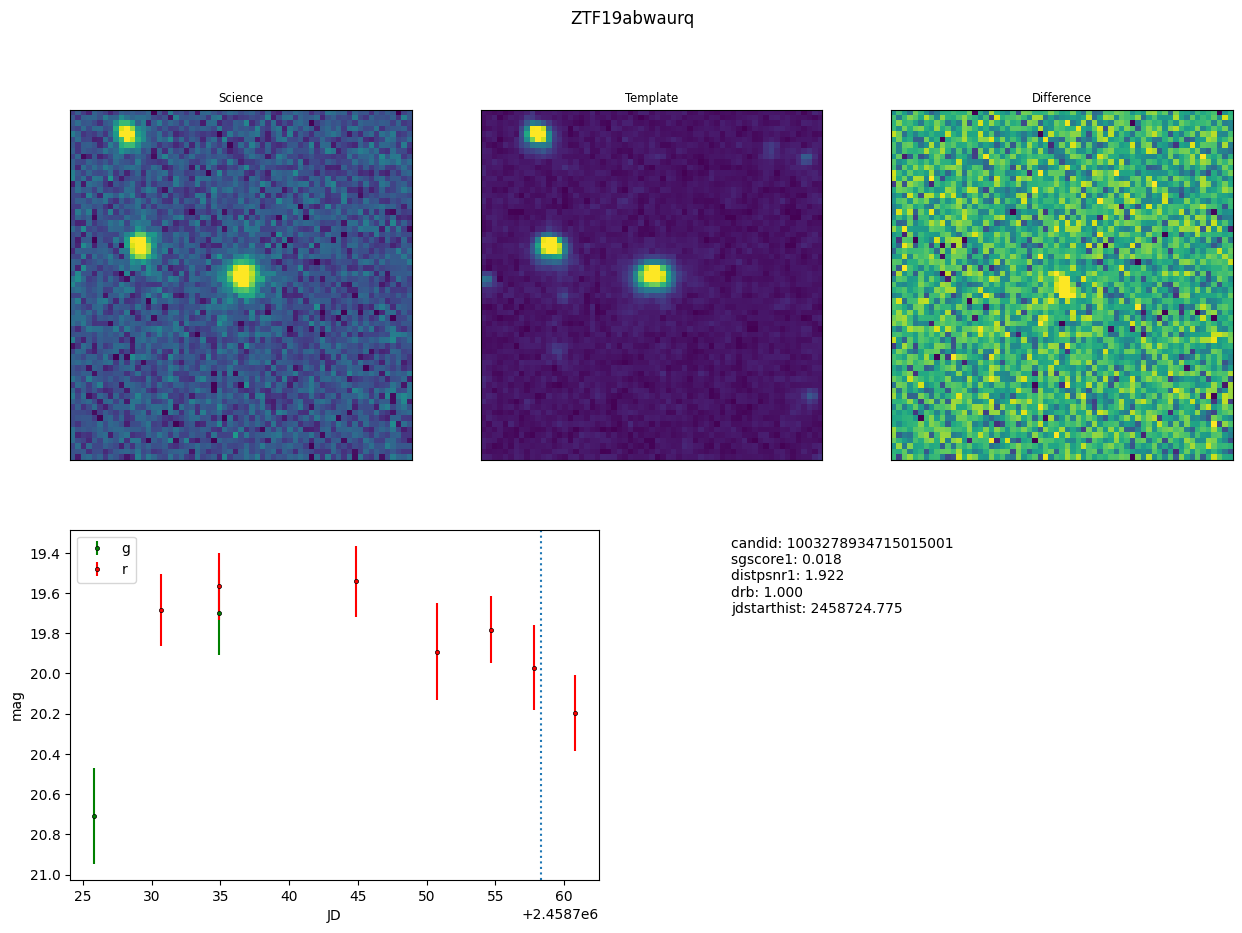

In [16]:
fig = generate_single_page(df.iloc[0])

In [17]:
outpath = output_dir / "candidates.pdf"
print(f"Saving PDF to {outpath}")

with PdfPages(outpath) as pdf:
    for i, row in tqdm(df.iterrows(), total=len(df)):
        generate_single_page(row)
        pdf.savefig()
        plt.close()

Saving PDF to /Users/robertstein/Code/mma_school_24_neutrinos/output/candidates.pdf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:09<00:00,  1.14s/it]
